In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from Data_Reader import MnistDataloader, show_result
from os.path import join
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

input_path = "input"
training_images_filepath = join(
    input_path, "train-images-idx3-ubyte/train-images.idx3-ubyte"
)
training_labels_filepath = join(
    input_path, "train-labels-idx1-ubyte/train-labels.idx1-ubyte"
)
test_images_filepath = join(input_path, "t10k-images-idx3-ubyte/t10k-images.idx3-ubyte")
test_labels_filepath = join(input_path, "t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte")

mnist_dataloader = MnistDataloader(
    training_images_filepath,
    training_labels_filepath,
    test_images_filepath,
    test_labels_filepath,
)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

x_train = np.array(x_train).reshape(-1, 28 * 28) / 255.0
x_test = np.array(x_test).reshape(-1, 28 * 28) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
n_list = [1, 3, 5, 7, 9]
for i in n_list:
    knn = KNeighborsClassifier(
        n_neighbors=i,
        metric='euclidean',
        weights='uniform'    
    )

    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"k-NN accuracy for k={i}:", acc)

k-NN accuracy for k=3: 0.9705
k-NN accuracy for k=5: 0.9688


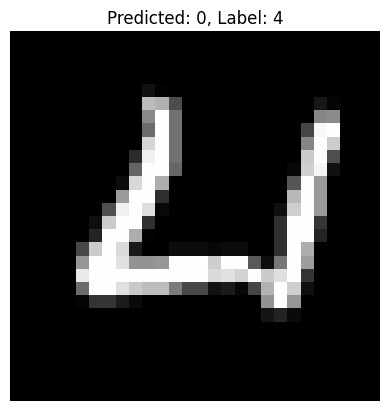

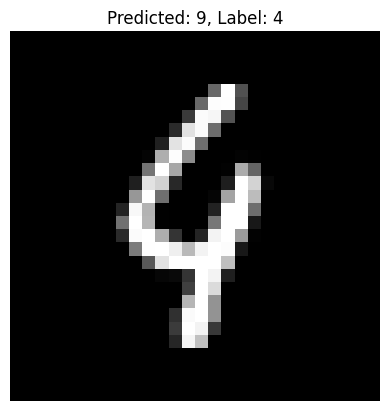

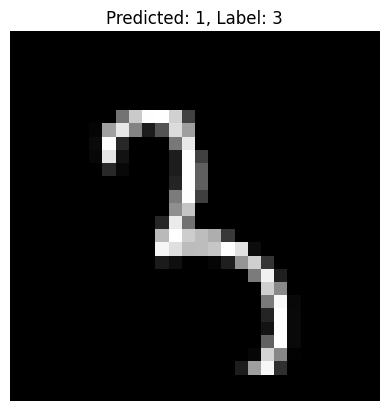

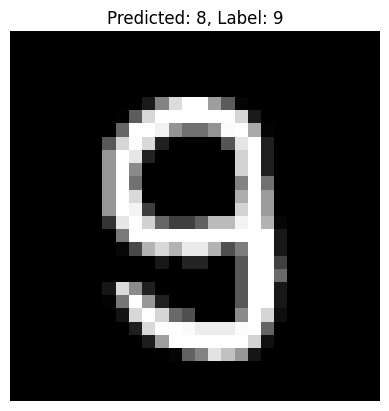

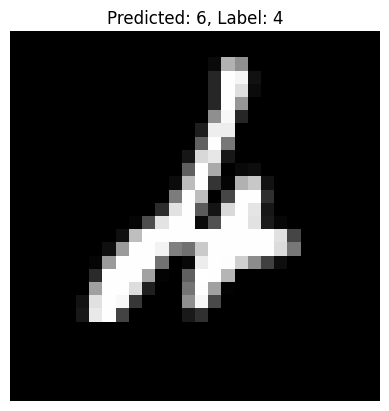

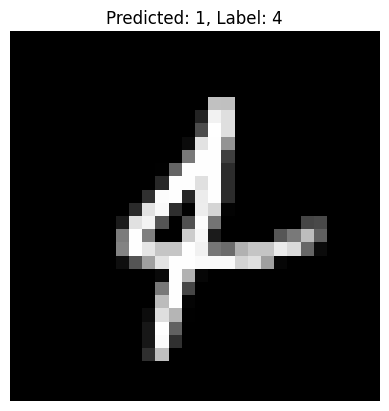

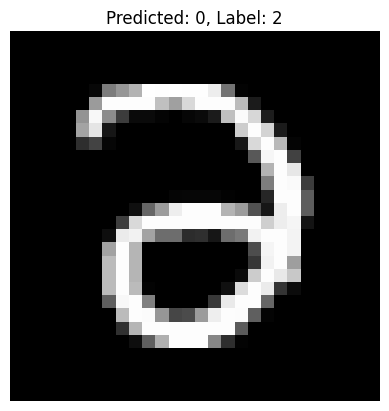

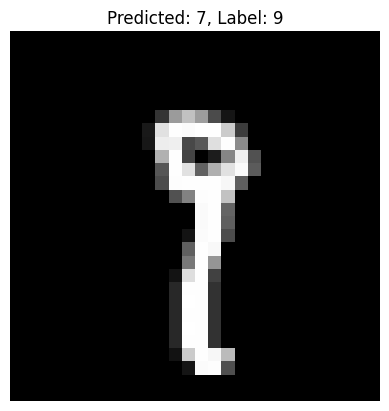

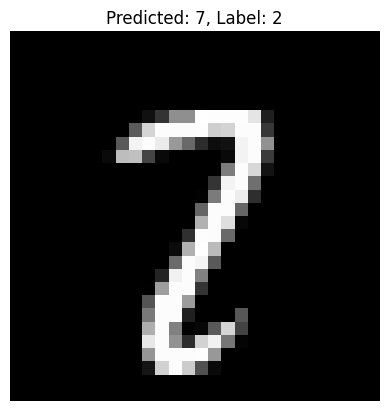

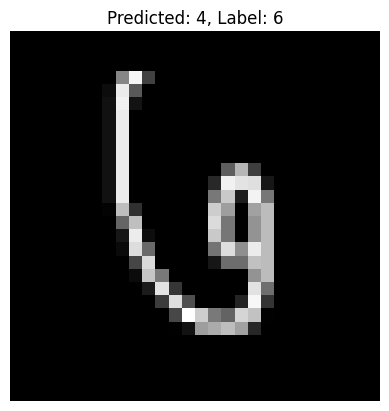

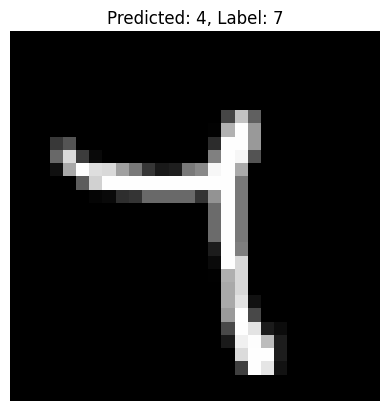

Number of wrong prediction: 312
Number of test sample: 10000


In [ ]:
show_result(x_test, y_test, y_pred)
